In [1]:
import gzip
import shutil

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


from scipy import stats 




In [8]:
df_scan = pd.read_csv('Loan_status_2007-2020Q3.gzip', nrows=400000, low_memory=False)
df_scan.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [9]:
df_scan.shape

(400000, 142)

In [3]:
df = pd.read_csv('Loan_status_2007-2020Q3.gzip', error_bad_lines = False)

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,48,58,117,127,128,129,132,133,134,137) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [33]:
#save as new dataset 
df . to_csv("Loan_status.csv", index=False)

### Exploratory Data Analysis

In [81]:
#size of dataset

df.shape

(2925493, 142)

In [82]:
#info on dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Columns: 142 entries, Unnamed: 0 to debt_settlement_flag
dtypes: float64(106), int64(1), object(35)
memory usage: 3.1+ GB


In [83]:
#check for null values

df.isnull().sum() 

Unnamed: 0                                          0
id                                                  0
loan_amnt                                           1
funded_amnt                                         1
funded_amnt_inv                                     1
                                               ...   
hardship_loan_status                          2782082
orig_projected_additional_accrued_interest    2746253
hardship_payoff_balance_amount                2743417
hardship_last_payment_amount                  2743417
debt_settlement_flag                                1
Length: 142, dtype: int64

In [19]:
# check the columns

df.columns

Index(['Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
       'hardship_length', 'hardship_dpd', 'hardship_loan_status',
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag'],
      dtype='object', length=142)

In [20]:
print(df.columns.values)

['Unnamed: 0' 'id' 'loan_amnt' 'funded_amnt' 'funded_amnt_inv' 'term'
 'int_rate' 'installment' 'grade' 'sub_grade' 'emp_title' 'emp_length'
 'home_ownership' 'annual_inc' 'verification_status' 'issue_d'
 'loan_status' 'pymnt_plan' 'url' 'purpose' 'title' 'zip_code'
 'addr_state' 'dti' 'delinq_2yrs' 'earliest_cr_line' 'fico_range_low'
 'fico_range_high' 'inq_last_6mths' 'mths_since_last_delinq'
 'mths_since_last_record' 'open_acc' 'pub_rec' 'revol_bal' 'revol_util'
 'total_acc' 'initial_list_status' 'out_prncp' 'out_prncp_inv'
 'total_pymnt' 'total_pymnt_inv' 'total_rec_prncp' 'total_rec_int'
 'total_rec_late_fee' 'recoveries' 'collection_recovery_fee'
 'last_pymnt_d' 'last_pymnt_amnt' 'next_pymnt_d' 'last_credit_pull_d'
 'last_fico_range_high' 'last_fico_range_low' 'collections_12_mths_ex_med'
 'mths_since_last_major_derog' 'policy_code' 'application_type'
 'annual_inc_joint' 'dti_joint' 'verification_status_joint'
 'acc_now_delinq' 'tot_coll_amt' 'tot_cur_bal' 'open_acc_6m' 'open_act

In [23]:
#check for null values

print(df.isnull().sum() )

Unnamed: 0                                          0
id                                                  0
loan_amnt                                           1
funded_amnt                                         1
funded_amnt_inv                                     1
                                               ...   
hardship_loan_status                          2782082
orig_projected_additional_accrued_interest    2746253
hardship_payoff_balance_amount                2743417
hardship_last_payment_amount                  2743417
debt_settlement_flag                                1
Length: 142, dtype: int64


In [84]:
#identify columns with null values
nan_cols = [i for i in df.columns if df[i].isnull().any()]

In [25]:
#columns with null values 
nan_cols

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_sta

In [85]:
#identify columns that have all null values for more than 50% of the data 

nan_cols50 = [i for i in df.columns if df[i].isnull().sum() > 0.50*len(df)]
len(nan_cols50)

35

#### Clean the data

In [86]:
#columns with null values for more than 50% of the data
nan_cols50

['mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'revol_bal_joint',
 'sec_app_fico_range_low',
 'sec_app_fico_range_high',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'orig_projected_additional_accrued_interest',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount']

In [7]:
df1 = df.drop(nan_cols50, axis = 1)

In [87]:
#size of dataset

df1.shape

(2925493, 107)

In [37]:
df1.loan_status.unique()

array(['Fully Paid', 'Charged Off', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Current',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Default', 'Issued'], dtype=object)

In [38]:
df1.debt_settlement_flag.unique()

array(['N', 'Y', nan], dtype=object)

In [39]:
df1.loan_status.value_counts()

Fully Paid                                             1497783
Current                                                1031016
Charged Off                                             362548
Late (31-120 days)                                       16154
In Grace Period                                          10028
Late (16-30 days)                                         2719
Issued                                                    2062
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                    433
Name: loan_status, dtype: int64

Text(0.5, 1.0, 'Loan Status Value Distribution')

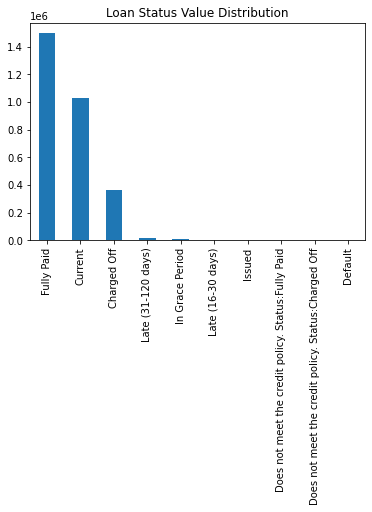

In [40]:
#Loan status distribution 

df1.loan_status.value_counts().plot.bar()
plt.title('Loan Status Value Distribution')

In [11]:
df1.debt_settlement_flag.value_counts()

N    2874021
Y      51471
Name: debt_settlement_flag, dtype: int64

In [14]:
df1.groupby('issue_d')['loan_status'].value_counts().head(100)

issue_d   loan_status                                        
Apr-2008  Fully Paid                                               128
          Does not meet the credit policy. Status:Fully Paid        68
          Does not meet the credit policy. Status:Charged Off       36
          Charged Off                                               27
Apr-2009  Fully Paid                                               250
                                                                 ...  
Aug-2016  Late (31-120 days)                                        65
          In Grace Period                                           40
          Late (16-30 days)                                          7
          Default                                                    2
Aug-2017  Fully Paid                                             21293
Name: loan_status, Length: 100, dtype: int64

#### Remove ongoing loans
##### because we dont know the status of the loan yet

###### Fully paid = pays on time     Charged off = does not pay the loans

In [88]:
df2 = df1.loc[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [89]:
df2.shape

(1860331, 107)

In [63]:
print(df2.columns.values)

['loan_amnt' 'funded_amnt' 'funded_amnt_inv' 'term' 'int_rate'
 'installment' 'grade' 'sub_grade' 'emp_title' 'emp_length'
 'home_ownership' 'annual_inc' 'verification_status' 'issue_d'
 'loan_status' 'pymnt_plan' 'purpose' 'title' 'zip_code' 'addr_state'
 'dti' 'delinq_2yrs' 'earliest_cr_line' 'fico_range_low' 'fico_range_high'
 'inq_last_6mths' 'open_acc' 'pub_rec' 'revol_bal' 'revol_util'
 'total_acc' 'initial_list_status' 'out_prncp' 'out_prncp_inv'
 'total_pymnt' 'total_pymnt_inv' 'total_rec_prncp' 'total_rec_int'
 'total_rec_late_fee' 'recoveries' 'collection_recovery_fee'
 'last_pymnt_d' 'last_pymnt_amnt' 'last_credit_pull_d'
 'last_fico_range_high' 'last_fico_range_low' 'collections_12_mths_ex_med'
 'policy_code' 'application_type' 'acc_now_delinq' 'tot_coll_amt'
 'tot_cur_bal' 'open_acc_6m' 'open_act_il' 'open_il_12m' 'open_il_24m'
 'mths_since_rcnt_il' 'total_bal_il' 'il_util' 'open_rv_12m' 'open_rv_24m'
 'max_bal_bc' 'all_util' 'total_rev_hi_lim' 'inq_fi' 'total_cu_tl'
 'inq

In [90]:
#remove columns with no prediction value
df2 = df2.drop(['Unnamed: 0','id', 'url' ], axis = 1)

In [52]:
print(df2.loan_status.value_counts(),'\n')
print(df2.loan_status.value_counts(normalize=True))

Fully Paid     1497783
Charged Off     362548
Name: loan_status, dtype: int64 

Fully Paid     0.805116
Charged Off    0.194884
Name: loan_status, dtype: float64


In [53]:
df2.isnull().sum()/len(df)*100

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
                                ...   
total_bal_ex_mort             1.616172
total_bc_limit                1.616172
total_il_high_credit_limit    2.308226
hardship_flag                 0.319741
debt_settlement_flag          0.000000
Length: 104, dtype: float64

In [54]:
#save as new dataset 

df2 . to_csv("Loan_status2.csv", index=False)

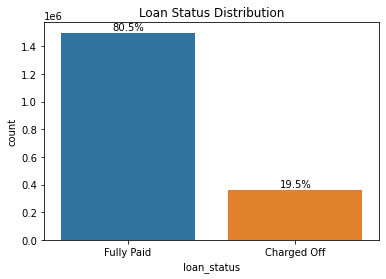

In [49]:
#Loan status after removing pending loans

ax=sns.countplot(x='loan_status',data=df2)
total = len(df2)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.title('Loan Status Distribution')
plt.show()

In [62]:
df2.policy_code.value_counts()

1.0    1860331
Name: policy_code, dtype: int64

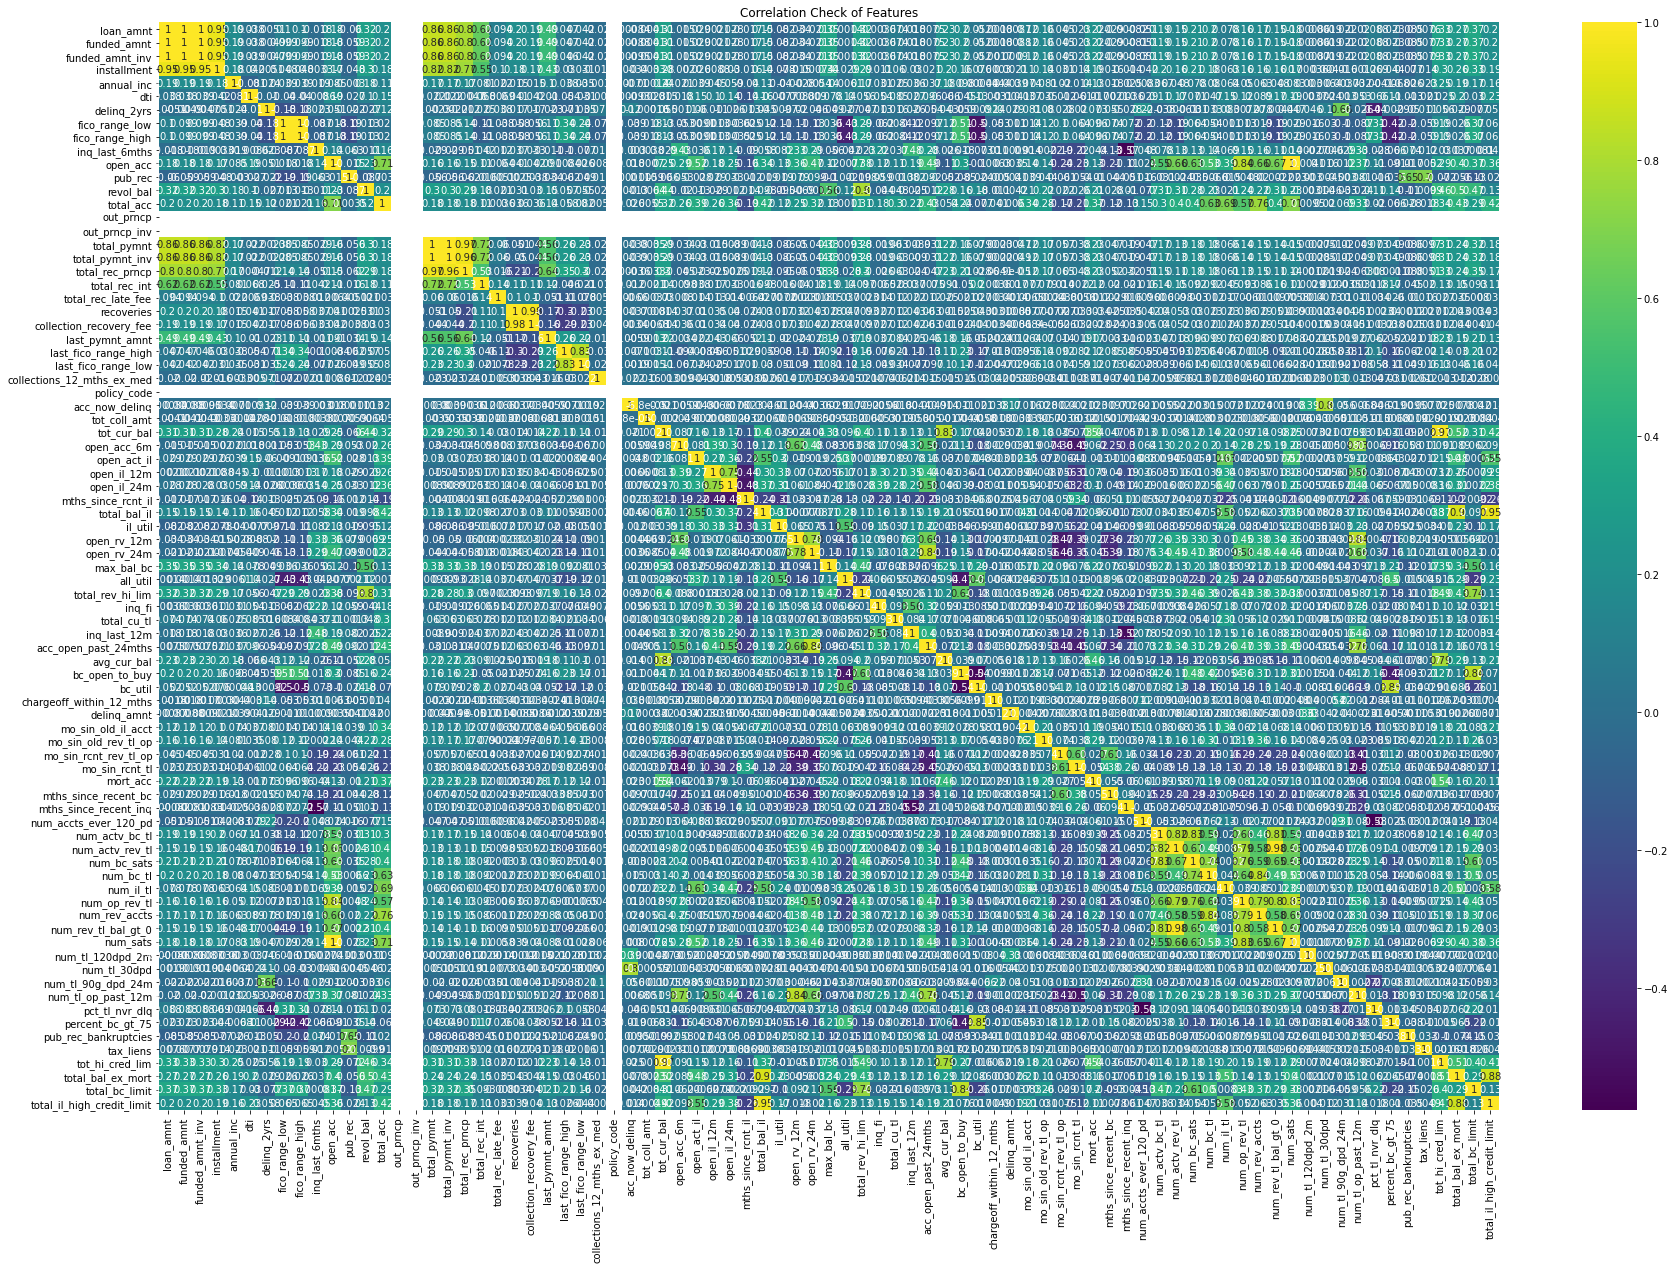

In [61]:
plt.figure(figsize=(30,20))
sns.heatmap(df2.corr(),annot=True,cmap='viridis')
plt.title('Correlation Check of Features');

In [91]:
#identify columns that have all null values for more than 0.01% of the data 

nan_cols1 = [i for i in df2.columns if df2[i].isnull().sum() > 0.01*len(df)]
len(nan_cols1)

50

In [16]:
nan_cols1

['emp_title',
 'emp_length',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit']

In [92]:
df3 = df2.drop(nan_cols1, axis = 1)

In [93]:
df3.shape

(1860331, 54)

In [79]:
df3.isnull().sum()/len(df3)*100

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
purpose                       0.000000
title                         1.150655
zip_code                      0.000054
addr_state                    0.000000
dti                           0.059559
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
fico_range_low                0.000000
fico_range_high               0.000000
inq_last_6mths                0.000054
open_acc                      0.000000
pub_rec                  

In [53]:
df3.shape

(1860331, 54)

In [82]:
#save as new dataset 

df3 . to_csv("Loan_status2.csv", index=False)

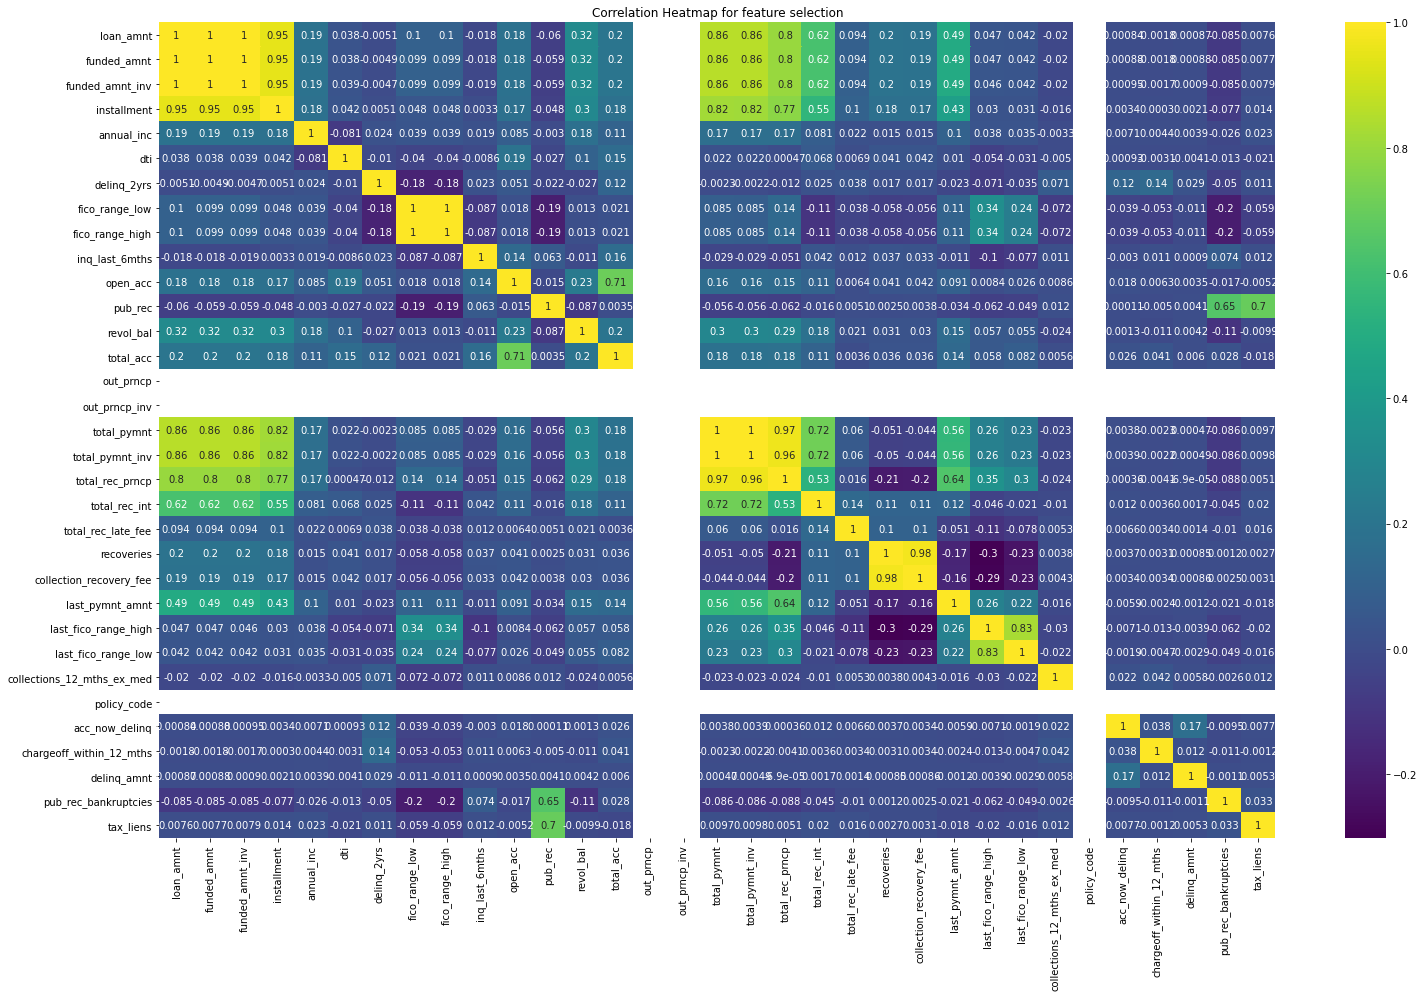

In [87]:
#plot the heatmap to identify corelation between the features

plt.figure(figsize=(25,15))
sns.heatmap(df3.corr(),annot=True,cmap='viridis')
plt.title('Correlation Heatmap for feature selection');

#### Identified more features to remove that dont have prediction power

* policy_code
* out_prncp
* out_prncp_inv


In [94]:
#remove columns with no prediction value
df3 = df3.drop(['policy_code','out_prncp', 'out_prncp_inv' ], axis = 1)

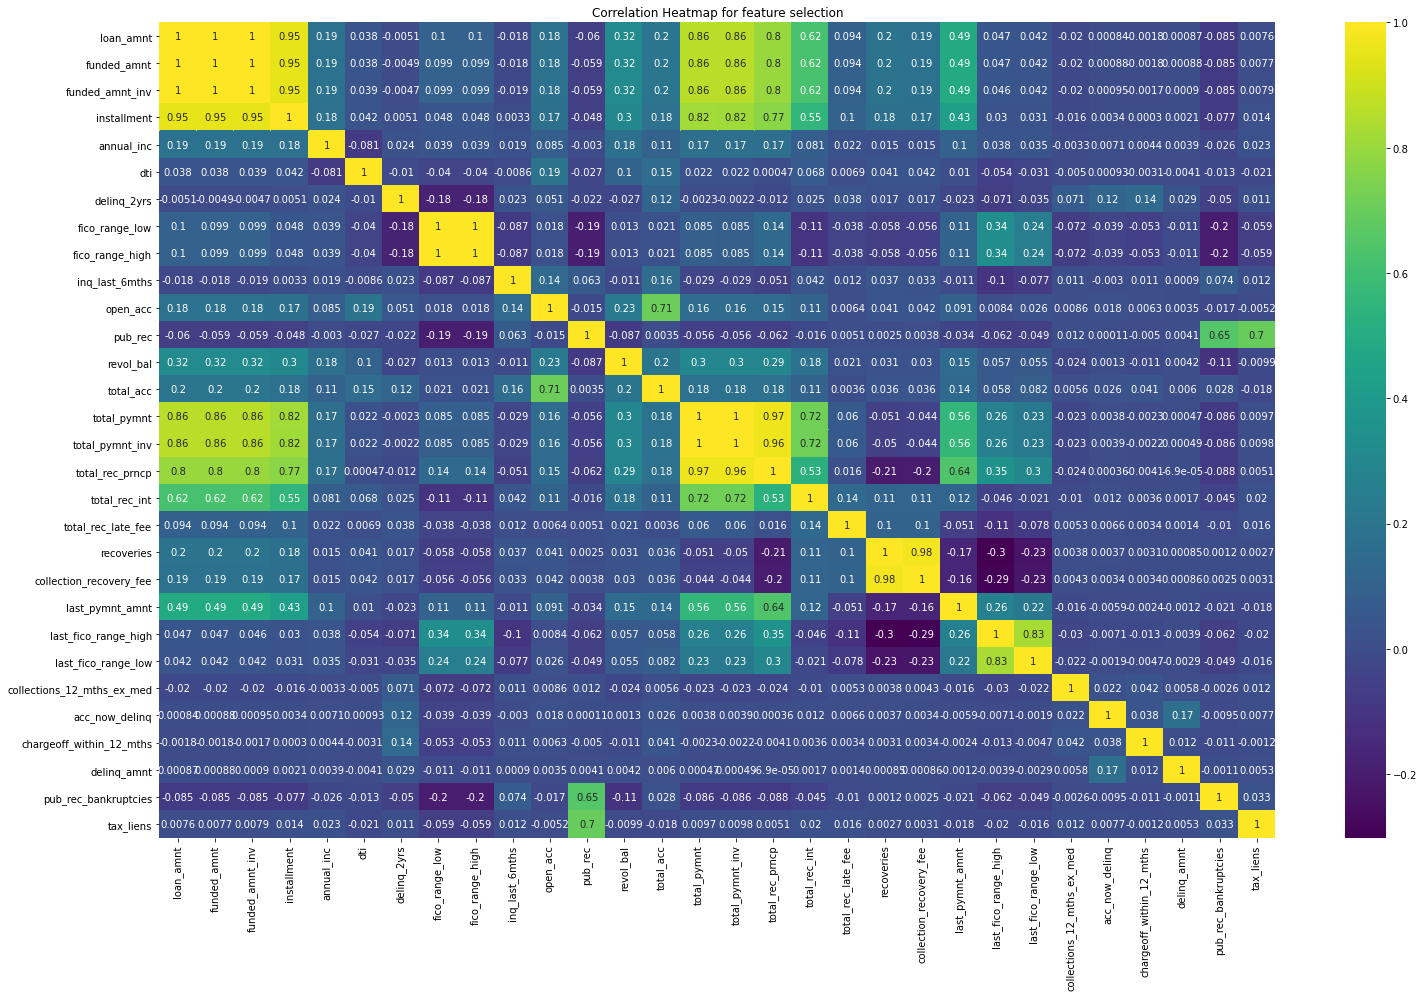

In [89]:
#plot the heatmap to identify corelation between the features

plt.figure(figsize=(25,15))
sns.heatmap(df3.corr(),annot=True,cmap='viridis')
plt.title('Correlation Heatmap for feature selection');

Text(0.5, 1.0, 'Boxplot Charged Off / Loan Amount')

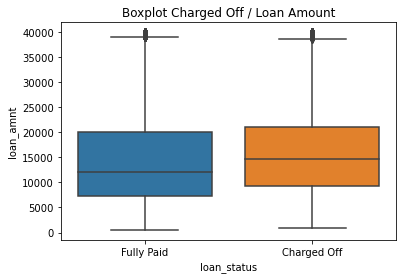

In [94]:
sns.boxplot(data = df3, x = 'loan_status', y = 'loan_amnt')
plt.title('Boxplot Charged Off / Loan Amount')

In [21]:
# count plot on two categorical variable
sns.countplot(x ='installment', hue = "loan_status", data = df3, palette=['#432371',"#FAAE7B"] )
 
# Show the plot
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-21-a596160a2407>", line 2, in <module>
    sns.countplot(x ='installment', hue = "loan_status", data = df3, palette=['#432371',"#FAAE7B"] )
  File "C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py", line 3559, in countplot
    plotter.plot(ax, kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py", line 1658, in plot
    self.annotate_axes(ax)
  File "C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py", line 395, in annotate_axes
    ax.set_xticks(np.arange(len(self.plot_data)))
  File "C:\Users\User\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py", line 400, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\matplotlib\axes\_base.py", line 3309, in set_xticks

TypeError: object of type 'NoneType' has no len()

Error in callback <function flush_figures at 0x0000027CF9C3BEE0> (for post_execute):


KeyboardInterrupt: 

In [22]:
dataTypeObj = df3.dtypes['installment']
dataTypeObj

dtype('float64')

In [23]:
dataTypeObj = df3.dtypes['loan_status']
dataTypeObj

dtype('O')

In [95]:
#change loan status to Fully paid as 1 and charged off as 0
df3['loan_status'] = df3['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

In [96]:
#rename column of loan_status as loan_paid, where 1 = loan paid, 0 = charged off
df3.rename(columns={'loan_status':'loan_paid'},inplace=True)

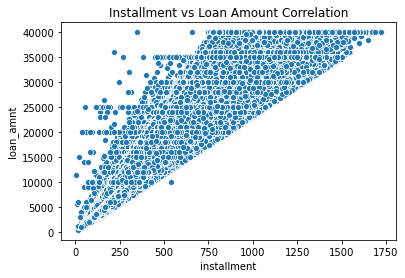

In [24]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)
plt.title('Installment vs Loan Amount Correlation');

In [97]:
df4 = df3.head(10000)

In [17]:
df4

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_fico_range_low,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,700.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,0.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,735.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,600.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,680.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,840256,5000.0,5000.0,4750.0,36 months,13.49%,169.66,C,C2,...,710.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
9996,9996,840257,14975.0,14975.0,14975.0,60 months,13.49%,344.50,C,C2,...,535.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
9997,9997,839365,3600.0,3600.0,3600.0,36 months,15.62%,125.90,D,D1,...,710.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
9998,9998,840121,15000.0,15000.0,15000.0,36 months,18.39%,545.23,E,E2,...,710.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N


Text(0.5, 1.0, 'Loan Amount Distribution')

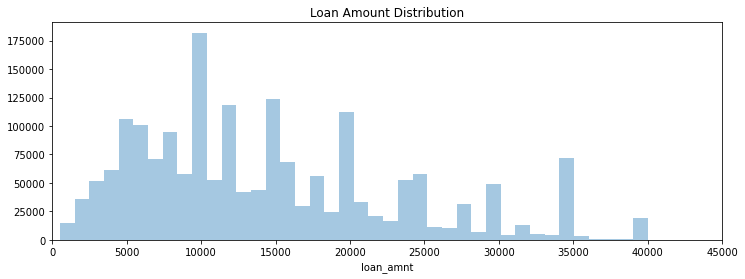

In [22]:
#check the variations in loan amount

plt.figure(figsize=(12,4))
sns.distplot(df3['loan_amnt'],kde=False,bins=40)
plt.xlim(0,45000)
plt.title('Loan Amount Distribution')

<Figure size 1440x1440 with 0 Axes>

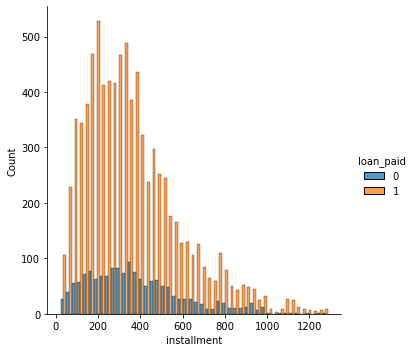

In [20]:
#plot to see relation between installment and loan payment
plt.figure(figsize=(20,20))
sns.displot(df4, x="installment", hue="loan_paid", multiple="dodge")

In [98]:
df3.title.value_counts()

Debt consolidation               941169
Credit card refinancing          366391
Home improvement                 111152
Other                            102322
Major purchase                    36294
                                  ...  
business improved                     1
Insurance Agency- Start-Up            1
Improvement and consolidation         1
Feel Good Consolidation               1
funds for unexpected repairs          1
Name: title, Length: 61685, dtype: int64

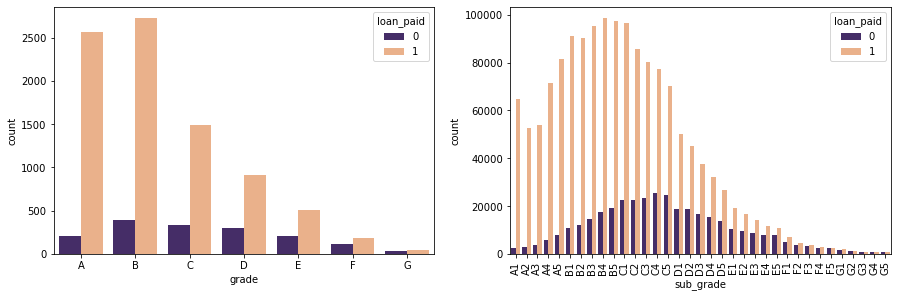

In [30]:
#relation between grades and subgrades with loan status 
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df4.grade.unique().tolist())
sns.countplot(x='grade', data=df4, hue='loan_paid', order=grade,  palette=['#432371',"#FAAE7B"] )
 

plt.subplot(2, 2, 2)
sub_grade = sorted(df3.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=df3, hue='loan_paid', order=sub_grade, palette=['#432371',"#FAAE7B"] )
 
g.set_xticklabels(g.get_xticklabels(), rotation=90);

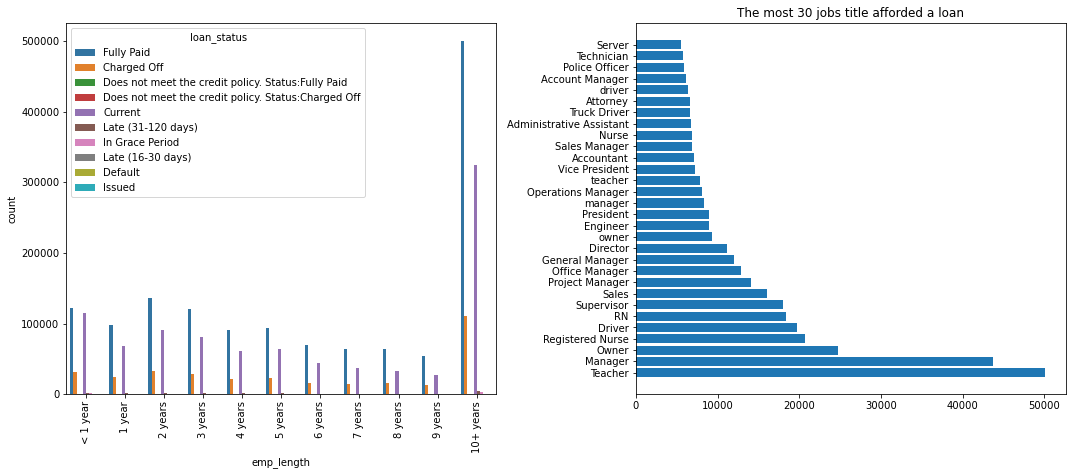

In [32]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=df, hue='loan_status', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(df.emp_title.value_counts()[:30].index, df.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

In [ ]:
#save as new dataset 
df3 . to_csv("Loan_statusN.csv", index=False)

In [34]:
df3.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_fico_range_low,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,700.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,0.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,735.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,600.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,680.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N


In [38]:
dataTypeObj = df3.dtypes['int_rate']
dataTypeObj

dtype('float64')

In [99]:
#change to string
df3['int_rate'] = df3['int_rate'].astype(str)

In [100]:
#remove % sign from int_rate
df3['int_rate'] = df3['int_rate'].str.rstrip('%').astype('float') / 100.0

In [101]:
#change to string
df3['revol_util'] = df3['revol_util'].astype(str)

In [102]:
#remove % sign from revol_util
df3['revol_util'] = df3['revol_util'].str.rstrip('%').astype('float') / 100.0

In [43]:
df3.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_fico_range_low,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,...,700.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,...,0.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,0.1596,84.33,C,C5,...,735.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,0.1349,339.31,C,C1,...,600.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,0.1269,67.79,B,B5,...,680.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N


### Data Preprocessing & Feature Engineering

In [78]:
#features of object type

df3.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'pymnt_plan', 'purpose', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'hardship_flag',
       'debt_settlement_flag'],
      dtype='object')

In [77]:
df3.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,last_fico_range_low,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag
0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,RENT,24000.0,...,700.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
1,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,RENT,30000.0,...,0.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
2,2400.0,2400.0,2400.0,36 months,0.1596,84.33,C,C5,RENT,12252.0,...,735.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
3,10000.0,10000.0,10000.0,36 months,0.1349,339.31,C,C1,RENT,49200.0,...,600.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
4,3000.0,3000.0,3000.0,60 months,0.1269,67.79,B,B5,RENT,80000.0,...,680.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N


In [132]:
df3.title.nunique()

61669

##### title has a lot of unique values. This will be hard to convert to numeric. Therefore we drop it

In [158]:
df3.drop('title', axis=1, inplace=True)

In [124]:
 dn = df3.title.value_counts() 
dn

Debt consolidation                        941169
Credit card refinancing                   366391
Home improvement                          111152
Other                                     102338
Major purchase                             36294
                                           ...  
credit card refinance and home improve         1
Medical Leave Debt                             1
First job out of grad school loan              1
deb cons                                       1
Credit Cosolidation                            1
Name: title, Length: 61669, dtype: int64

In [121]:
#df3['title'].replace(['business improved', 'Insurance Agency- Start-Up','Improvement and consolidation', 'Feel Good Consolidation', 'funds for unexpected repairs', 'Citi Gone', 'SecondChanceLoan', 'CcConsoldation','Serious, stable borrower trying to get rid of high interest credit cards'
, 'Credit ref', 'lending club loan for home', 'CCARD LOAN', 'Womens Boutique', 'a/c','3yearplan', 'Funds To Consolidate Debt'  ], 'Other', inplace=True)

In [125]:
#type(dn)

pandas.core.series.Series

In [127]:
#dn1 = pd.DataFrame({'type':dn.index, 'list':dn.values})
#dn1

,type,list
0,Debt consolidation,941169
1,Credit card refinancing,366391
2,Home improvement,111152
3,Other,102338
4,Major purchase,36294
...,...,...
61664,credit card refinance and home improve,1
61665,Medical Leave Debt,1
61666,First job out of grad school loan,1
61667,deb cons,1


In [150]:
#criteria = dn1[ dn1.iloc[:,1]>= 1000 ]     
#criteria

,type,list
0,Debt consolidation,941169
1,Credit card refinancing,366391
2,Home improvement,111152
3,Other,102338
4,Major purchase,36294
5,Medical expenses,20548
6,Business,16806
7,Car financing,16802
8,Debt Consolidation,15695
9,Vacation,12273


In [151]:
#criteria.shape

(26, 2)

In [154]:
#dff =  df3.loc[df['title'].isin([criteria])]
#dff


C:\Users\User\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,last_fico_range_low,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag


In [141]:
print(df3['title'].unique())

['Computer' 'bike' 'real estate business' ... 'new kitchen for momma!'
 'New Baby and New House (CC Consolidate)' 'Credit Card/Auto Repair']


In [ ]:
df3.title.value_counts()

In [156]:
df3.pymnt_plan.nunique()

1

##### no prediction value for pymnt_plan as there is only 1 unique value

In [157]:
df3.drop('pymnt_plan', axis=1, inplace=True)

#### Filter based feature selection done using Microsoft Machine Learning Studio
##### Using Chi Squared feature scoring method

* Selected features with high score
* loan_paid, recoveries, collection_recovery_fee, last_fico_range_high, last_fico_range_low, total_rec_prncp, last_pymnt_amnt,
* total_pymnt, total_pymnt_inv, int_rate, grade, sub_grade, last_credit_pull_d, total_rec_late_fee, title, term, 
* fico_range_low, fico_range_high, dti, verification_status, funded_amnt, loan_amnt, funded_amnt_inv, installment,
* home_ownership, revol_util, annual_inc, inq_last_6mths, pub_rec_bankruptcies, pub_rec, revol_bal

In [162]:
features_final = ['recoveries', 'collection_recovery_fee', 'last_fico_range_high', 'last_fico_range_low', 'total_rec_prncp', 'last_pymnt_amnt',
'total_pymnt', 'total_pymnt_inv', 'int_rate', 'grade', 'sub_grade', 'last_credit_pull_d', 'total_rec_late_fee', 'term', 
 'fico_range_low', 'fico_range_high', 'dti', 'verification_status', 'funded_amnt', 'loan_amnt', 'funded_amnt_inv', 'installment',
 'home_ownership', 'revol_util', 'annual_inc', 'inq_last_6mths', 'pub_rec_bankruptcies', 'pub_rec', 'revol_bal', 'loan_paid']

In [163]:
features_final

['recoveries',
 'collection_recovery_fee',
 'last_fico_range_high',
 'last_fico_range_low',
 'total_rec_prncp',
 'last_pymnt_amnt',
 'total_pymnt',
 'total_pymnt_inv',
 'int_rate',
 'grade',
 'sub_grade',
 'last_credit_pull_d',
 'total_rec_late_fee',
 'term',
 'fico_range_low',
 'fico_range_high',
 'dti',
 'verification_status',
 'funded_amnt',
 'loan_amnt',
 'funded_amnt_inv',
 'installment',
 'home_ownership',
 'revol_util',
 'annual_inc',
 'inq_last_6mths',
 'pub_rec_bankruptcies',
 'pub_rec',
 'revol_bal',
 'loan_paid']

In [166]:
df4 = df3[features_final]
df4

,recoveries,collection_recovery_fee,last_fico_range_high,last_fico_range_low,total_rec_prncp,last_pymnt_amnt,total_pymnt,total_pymnt_inv,int_rate,grade,...,funded_amnt_inv,installment,home_ownership,revol_util,annual_inc,inq_last_6mths,pub_rec_bankruptcies,pub_rec,revol_bal,loan_paid
0,0.00,0.0000,704.0,700.0,5000.00,171.62,5863.155187,5833.84,0.1065,B,...,4975.0,162.87,RENT,0.837,24000.0,1.0,0.0,0.0,13648.0,1
1,122.90,1.1100,499.0,0.0,456.46,119.66,1014.530000,1014.53,0.1527,C,...,2500.0,59.83,RENT,0.094,30000.0,5.0,0.0,0.0,1687.0,0
2,0.00,0.0000,739.0,735.0,2400.00,649.91,3005.666844,3005.67,0.1596,C,...,2400.0,84.33,RENT,0.985,12252.0,2.0,0.0,0.0,2956.0,1
3,0.00,0.0000,604.0,600.0,10000.00,357.48,12231.890000,12231.89,0.1349,C,...,10000.0,339.31,RENT,0.210,49200.0,1.0,0.0,0.0,5598.0,1
4,0.00,0.0000,684.0,680.0,3000.00,67.30,4066.908161,4066.91,0.1269,B,...,3000.0,67.79,RENT,0.539,80000.0,0.0,0.0,0.0,27783.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925488,0.00,0.0000,504.0,500.0,2561.41,690.30,7749.830000,7749.83,0.2399,E,...,24000.0,690.30,RENT,0.249,107000.0,1.0,1.0,2.0,9688.0,0
2925489,0.00,0.0000,769.0,765.0,10000.00,2151.99,11233.834658,11233.83,0.0799,A,...,10000.0,313.32,MORTGAGE,0.157,65000.0,0.0,0.0,0.0,9751.0,1
2925490,537.87,96.8166,539.0,535.0,6424.36,358.26,9484.880000,9484.88,0.1699,D,...,10050.0,358.26,RENT,0.470,37000.0,1.0,0.0,0.0,14300.0,0
2925491,0.00,0.0000,764.0,760.0,6000.00,2958.01,6917.541543,6917.54,0.1144,B,...,6000.0,197.69,RENT,0.101,41000.0,0.0,0.0,0.0,1356.0,1


In [168]:
dfff= df3[df3.columns[~df3.columns.isin(features_final)]]
dfff

,issue_d,purpose,zip_code,addr_state,delinq_2yrs,earliest_cr_line,open_acc,total_acc,initial_list_status,total_rec_int,last_pymnt_d,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens,hardship_flag,debt_settlement_flag
0,Dec-2011,credit_card,860xx,AZ,0.0,Jan-1985,3.0,9.0,f,863.16,Jan-2015,0.0,Individual,0.0,0.0,0.0,0.0,N,N
1,Dec-2011,car,309xx,GA,0.0,Apr-1999,3.0,4.0,f,435.17,Apr-2013,0.0,Individual,0.0,0.0,0.0,0.0,N,N
2,Dec-2011,small_business,606xx,IL,0.0,Nov-2001,2.0,10.0,f,605.67,Jun-2014,0.0,Individual,0.0,0.0,0.0,0.0,N,N
3,Dec-2011,other,917xx,CA,0.0,Feb-1996,10.0,37.0,f,2214.92,Jan-2015,0.0,Individual,0.0,0.0,0.0,0.0,N,N
4,Dec-2011,other,972xx,OR,0.0,Jan-1996,15.0,38.0,f,1066.91,Jan-2017,0.0,Individual,0.0,0.0,0.0,0.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925488,Apr-2017,other,801xx,CO,3.0,Apr-1995,13.0,24.0,f,5188.42,Mar-2018,1.0,Individual,0.0,1.0,0.0,1.0,N,N
2925489,Apr-2017,debt_consolidation,187xx,PA,1.0,Sep-1993,15.0,27.0,w,1233.83,Oct-2019,0.0,Individual,0.0,0.0,0.0,0.0,N,N
2925490,Apr-2017,debt_consolidation,220xx,VA,0.0,May-1993,15.0,21.0,w,2522.65,May-2019,0.0,Individual,0.0,0.0,0.0,0.0,N,N
2925491,Apr-2017,credit_card,105xx,NY,1.0,May-1990,9.0,18.0,w,917.54,Jan-2019,0.0,Individual,1.0,0.0,51.0,0.0,N,N


In [170]:
df6 = df3.drop(dfff, axis = 1)
df6

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,pub_rec_bankruptcies
0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,RENT,24000.0,...,5833.84,5000.00,0.00,0.00,0.0000,171.62,May-2020,704.0,700.0,0.0
1,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,RENT,30000.0,...,1014.53,456.46,0.00,122.90,1.1100,119.66,Oct-2016,499.0,0.0,0.0
2,2400.0,2400.0,2400.0,36 months,0.1596,84.33,C,C5,RENT,12252.0,...,3005.67,2400.00,0.00,0.00,0.0000,649.91,Jun-2017,739.0,735.0,0.0
3,10000.0,10000.0,10000.0,36 months,0.1349,339.31,C,C1,RENT,49200.0,...,12231.89,10000.00,16.97,0.00,0.0000,357.48,Apr-2016,604.0,600.0,0.0
4,3000.0,3000.0,3000.0,60 months,0.1269,67.79,B,B5,RENT,80000.0,...,4066.91,3000.00,0.00,0.00,0.0000,67.30,Apr-2018,684.0,680.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925488,24000.0,24000.0,24000.0,60 months,0.2399,690.30,E,E2,RENT,107000.0,...,7749.83,2561.41,0.00,0.00,0.0000,690.30,May-2020,504.0,500.0,1.0
2925489,10000.0,10000.0,10000.0,36 months,0.0799,313.32,A,A5,MORTGAGE,65000.0,...,11233.83,10000.00,0.00,0.00,0.0000,2151.99,Oct-2019,769.0,765.0,0.0
2925490,10050.0,10050.0,10050.0,36 months,0.1699,358.26,D,D1,RENT,37000.0,...,9484.88,6424.36,0.00,537.87,96.8166,358.26,Nov-2019,539.0,535.0,0.0
2925491,6000.0,6000.0,6000.0,36 months,0.1144,197.69,B,B4,RENT,41000.0,...,6917.54,6000.00,0.00,0.00,0.0000,2958.01,Mar-2020,764.0,760.0,0.0


In [104]:
len(features_final)

31

In [171]:
df6.shape

(1860331, 30)

In [172]:
df6.loan_paid

0          1
1          0
2          1
3          1
4          1
          ..
2925488    0
2925489    1
2925490    0
2925491    1
2925492    0
Name: loan_paid, Length: 1860331, dtype: int64

In [225]:
df6 = df6.dropna()

In [226]:
df6

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,pub_rec_bankruptcies
0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,RENT,24000.0,...,5833.84,5000.00,0.00,0.00,0.0000,171.62,May-2020,704.0,700.0,0.0
1,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,RENT,30000.0,...,1014.53,456.46,0.00,122.90,1.1100,119.66,Oct-2016,499.0,0.0,0.0
2,2400.0,2400.0,2400.0,36 months,0.1596,84.33,C,C5,RENT,12252.0,...,3005.67,2400.00,0.00,0.00,0.0000,649.91,Jun-2017,739.0,735.0,0.0
3,10000.0,10000.0,10000.0,36 months,0.1349,339.31,C,C1,RENT,49200.0,...,12231.89,10000.00,16.97,0.00,0.0000,357.48,Apr-2016,604.0,600.0,0.0
4,3000.0,3000.0,3000.0,60 months,0.1269,67.79,B,B5,RENT,80000.0,...,4066.91,3000.00,0.00,0.00,0.0000,67.30,Apr-2018,684.0,680.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925488,24000.0,24000.0,24000.0,60 months,0.2399,690.30,E,E2,RENT,107000.0,...,7749.83,2561.41,0.00,0.00,0.0000,690.30,May-2020,504.0,500.0,1.0
2925489,10000.0,10000.0,10000.0,36 months,0.0799,313.32,A,A5,MORTGAGE,65000.0,...,11233.83,10000.00,0.00,0.00,0.0000,2151.99,Oct-2019,769.0,765.0,0.0
2925490,10050.0,10050.0,10050.0,36 months,0.1699,358.26,D,D1,RENT,37000.0,...,9484.88,6424.36,0.00,537.87,96.8166,358.26,Nov-2019,539.0,535.0,0.0
2925491,6000.0,6000.0,6000.0,36 months,0.1144,197.69,B,B4,RENT,41000.0,...,6917.54,6000.00,0.00,0.00,0.0000,2958.01,Mar-2020,764.0,760.0,0.0


In [274]:
df_sample=df6.sample(n=50000)

In [275]:
df_sample

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,pub_rec_bankruptcies
380164,2000.0,2000.0,2000.0,36 months,0.1602,70.34,C,C5,MORTGAGE,10000.0,...,607.62,317.99,0.0,118.80,21.3840,70.34,Nov-2019,534.0,530.0,1.0
2571450,3300.0,3300.0,3300.0,36 months,0.1399,112.78,C,C3,RENT,80000.0,...,3636.24,3300.00,0.0,0.00,0.0000,2730.15,Apr-2019,529.0,525.0,0.0
168366,11000.0,11000.0,10975.0,36 months,0.1311,371.22,B,B4,RENT,36000.0,...,13299.07,11000.00,0.0,0.00,0.0000,1825.33,Mar-2019,699.0,695.0,0.0
2595348,8500.0,8500.0,8500.0,36 months,0.1049,276.24,B,B3,MORTGAGE,76000.0,...,7805.50,6114.37,30.0,321.52,57.8736,276.24,Apr-2019,524.0,520.0,0.0
233340,6000.0,6000.0,6000.0,36 months,0.2145,227.44,D,D5,RENT,23000.0,...,3624.74,2203.66,0.0,0.00,0.0000,227.44,Jun-2019,499.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420080,12000.0,12000.0,12000.0,36 months,0.0917,382.55,B,B2,RENT,40000.0,...,8318.92,3959.36,0.0,3358.00,604.4400,382.55,Aug-2018,619.0,615.0,0.0
2600414,15000.0,15000.0,15000.0,60 months,0.1699,372.71,D,D1,MORTGAGE,67305.0,...,17995.02,15000.00,0.0,0.00,0.0000,12791.24,May-2020,674.0,670.0,1.0
2574500,8050.0,8050.0,8050.0,36 months,0.0699,248.53,A,A2,MORTGAGE,109000.0,...,8960.07,8050.00,0.0,0.00,0.0000,742.96,May-2020,769.0,765.0,0.0
2144148,8000.0,8000.0,8000.0,36 months,0.0917,255.04,B,B2,RENT,45000.0,...,9178.60,8000.00,0.0,0.00,0.0000,7.35,Oct-2019,574.0,570.0,1.0


In [276]:
#features of object type

df_sample.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'last_credit_pull_d'],
      dtype='object')

In [277]:
df3.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [278]:

df_sample['term'] = df_sample['term'].map({' 36 months': 1, ' 60 months': 0})

In [279]:
df3.sub_grade.unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [280]:
df_sample['sub_grade'] = df_sample['sub_grade'].map({'B5' :1, 'C5':2, 'B1':3, 'A4':4, 'E3':5, 'C3':6, 'A1':7, 'E2':8, 'E5':9, 
                                                     'D5':10, 'B4':11,
       'A3':12, 'D3':13, 'D4':14, 'E4':15, 'C4':16, 'B2':17, 'C1':18, 'C2':19, 'F3':20, 'D2':21, 'E1':22,
       'B3':23, 'G2':24, 'A5':25, 'D1':26, 'A2':27, 'F5':28, 'F4':29, 'F1':30, 'F2':31, 'G5':32, 'G1':33,
       'G4':34, 'G3':35})

In [281]:
df3.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [282]:

df_sample['grade'] = df_sample['grade'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7})

In [283]:
df3.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [284]:
df_sample['home_ownership'] = df_sample['home_ownership'].map({'RENT': 1, 'OWN':2, 'MORTGAGE':3, 'OTHER':4, 'NONE':5, 'ANY':6 })

In [285]:
df3.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [286]:
df_sample['verification_status'] = df_sample['verification_status'].map({'Verified':1, 'Source Verified':2, 'Not Verified':0})

In [287]:
df_sample.drop('last_credit_pull_d', axis=1, inplace=True)  

In [288]:
 df_sample.isna().any()

loan_amnt                  False
funded_amnt                False
funded_amnt_inv            False
term                       False
int_rate                   False
installment                False
grade                      False
sub_grade                  False
home_ownership             False
annual_inc                 False
verification_status        False
loan_paid                  False
dti                        False
fico_range_low             False
fico_range_high            False
inq_last_6mths             False
pub_rec                    False
revol_bal                  False
revol_util                 False
total_pymnt                False
total_pymnt_inv            False
total_rec_prncp            False
total_rec_late_fee         False
recoveries                 False
collection_recovery_fee    False
last_pymnt_amnt            False
last_fico_range_high       False
last_fico_range_low        False
pub_rec_bankruptcies       False
dtype: bool

In [289]:
df_sample

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,pub_rec_bankruptcies
380164,2000.0,2000.0,2000.0,1,0.1602,70.34,3,2,3,10000.0,...,607.620000,607.62,317.99,0.0,118.80,21.3840,70.34,534.0,530.0,1.0
2571450,3300.0,3300.0,3300.0,1,0.1399,112.78,3,6,1,80000.0,...,3636.235845,3636.24,3300.00,0.0,0.00,0.0000,2730.15,529.0,525.0,0.0
168366,11000.0,11000.0,10975.0,1,0.1311,371.22,2,11,1,36000.0,...,13329.360004,13299.07,11000.00,0.0,0.00,0.0000,1825.33,699.0,695.0,0.0
2595348,8500.0,8500.0,8500.0,1,0.1049,276.24,2,23,3,76000.0,...,7805.500000,7805.50,6114.37,30.0,321.52,57.8736,276.24,524.0,520.0,0.0
233340,6000.0,6000.0,6000.0,1,0.2145,227.44,4,10,1,23000.0,...,3624.740000,3624.74,2203.66,0.0,0.00,0.0000,227.44,499.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420080,12000.0,12000.0,12000.0,1,0.0917,382.55,2,17,1,40000.0,...,8318.920000,8318.92,3959.36,0.0,3358.00,604.4400,382.55,619.0,615.0,0.0
2600414,15000.0,15000.0,15000.0,0,0.1699,372.71,4,26,3,67305.0,...,17995.022128,17995.02,15000.00,0.0,0.00,0.0000,12791.24,674.0,670.0,1.0
2574500,8050.0,8050.0,8050.0,1,0.0699,248.53,1,27,3,109000.0,...,8960.067245,8960.07,8050.00,0.0,0.00,0.0000,742.96,769.0,765.0,0.0
2144148,8000.0,8000.0,8000.0,1,0.0917,255.04,2,17,1,45000.0,...,9178.603670,9178.60,8000.00,0.0,0.00,0.0000,7.35,574.0,570.0,1.0


In [290]:
#features of object type

df_sample.select_dtypes(['object']).columns

Index([], dtype='object')

In [291]:
df_sample.sub_grade

380164      2
2571450     6
168366     11
2595348    23
233340     10
           ..
2420080    17
2600414    26
2574500    27
2144148    17
1225880    25
Name: sub_grade, Length: 50000, dtype: int64

### Testing the model

* Get a sample of the dataset for testing

In [292]:
# get prediction column

X = df_sample.drop('loan_paid',axis=1)
y = df_sample['loan_paid']

from sklearn.model_selection import train_test_split

In [293]:
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,pub_rec_bankruptcies
380164,2000.0,2000.0,2000.0,1,0.1602,70.34,3,2,3,10000.0,...,607.620000,607.62,317.99,0.0,118.80,21.3840,70.34,534.0,530.0,1.0
2571450,3300.0,3300.0,3300.0,1,0.1399,112.78,3,6,1,80000.0,...,3636.235845,3636.24,3300.00,0.0,0.00,0.0000,2730.15,529.0,525.0,0.0
168366,11000.0,11000.0,10975.0,1,0.1311,371.22,2,11,1,36000.0,...,13329.360004,13299.07,11000.00,0.0,0.00,0.0000,1825.33,699.0,695.0,0.0
2595348,8500.0,8500.0,8500.0,1,0.1049,276.24,2,23,3,76000.0,...,7805.500000,7805.50,6114.37,30.0,321.52,57.8736,276.24,524.0,520.0,0.0
233340,6000.0,6000.0,6000.0,1,0.2145,227.44,4,10,1,23000.0,...,3624.740000,3624.74,2203.66,0.0,0.00,0.0000,227.44,499.0,0.0,0.0


In [294]:
y.tail()

2420080    0
2600414    1
2574500    1
2144148    1
1225880    1
Name: loan_paid, dtype: int64

In [295]:
#train-test split
#split the dataset to test dataset 0.3 of the sample dataset

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [296]:
# Implement Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

RFclassifier=RandomForestClassifier()
RFclassifier.fit(X_train,y_train)

RandomForestClassifier()

In [261]:
# Prediction
y_pred=RFclassifier.predict(X_test)

In [262]:
# Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.99755

In [263]:
#confusion matrix

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[11558   147]
 [    0 48295]]


In [264]:
#classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     11705
           1       1.00      1.00      1.00     48295

    accuracy                           1.00     60000
   macro avg       1.00      0.99      1.00     60000
weighted avg       1.00      1.00      1.00     60000



In [265]:
#Implement Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier

DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [266]:
DTy_pred=DTclassifier.predict(X_test)

In [267]:
#checking accuracy

DTscore=accuracy_score(y_test,DTy_pred)
DTscore

0.9964666666666666

In [268]:
#confusion matrix

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, DTy_pred))

[[11590   115]
 [   97 48198]]


In [269]:
#classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, DTy_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11705
           1       1.00      1.00      1.00     48295

    accuracy                           1.00     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       1.00      1.00      1.00     60000



In [273]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(use_label_encoder=False)

ModuleNotFoundError: No module named 'xgboost'